# Illustrasjoner

In [23]:
import dhlab.nbtext as nb
import dhlab.graph_networkx_louvain as gnl
import dhlab.module_update as mu
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
mu.css()

In [94]:
mu.code_toggle()

In [64]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [41]:
plt.rcParams.update({'font.size': 14})

Illustrations for article "Main developments in the post-war discourse on health: 
A multidisciplinary overview of developments in Norwegian newspapers, 1950 - 2010"


Illustrasjoner som kan forbedres, og hentes fra andre datasett. Viser begge muligheter.

Først den som viser helse sammenlignent med nandre ord. Henter først illustrasjonene fra REV 20.10 dokumentet. Men husker at det var en kurve til for akkurat ordet helse. 

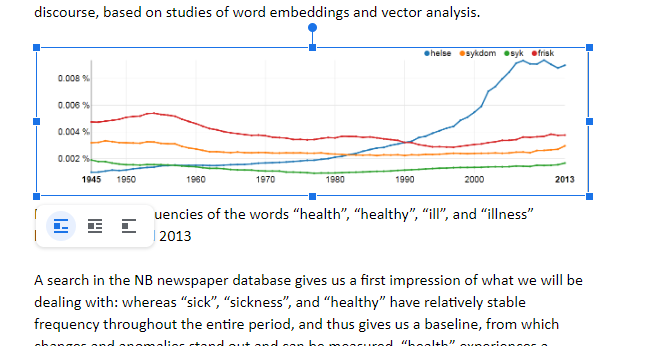

In [55]:
ngram = lambda x, smooth=2, media='avis': nb.nb_ngram(x, corpus = media,smooth=smooth, years=(1950, 2000)).plot(lw=3, title = x + "-" + media, figsize=(12,7));

# 'helse, frisk, syk, sykdom'

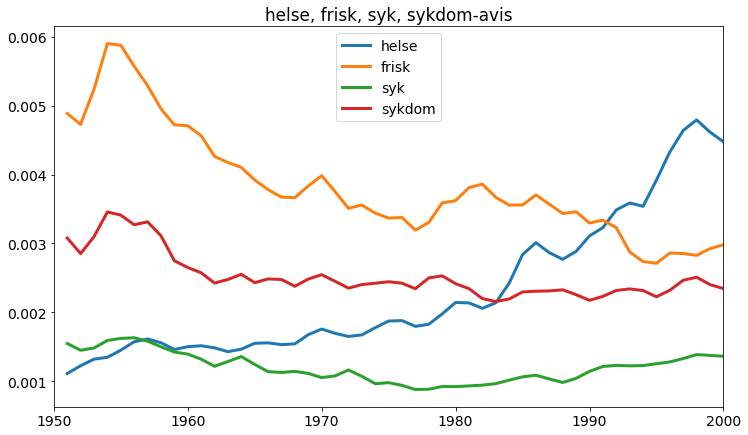

In [56]:
ngram('helse, frisk, syk, sykdom');

In [ ]:
nb.nb_ngram()

# Så et par galakser

En for ordet helse, og en for sykdom

Mulig det er bedre å kommunisere gjennom clustringen, altså hvilke topos som galaksen definerer. Men se også demokrati-analysen om det kan være ideer der for å koble topoiene til utviklingen. Galaksene klemmer sammen utviklingen til et eneste stort tema, uavhengig av tid, og man kunne tenke seg å se på når og hvordan de forskjellige ordene kom inn i diskursen.

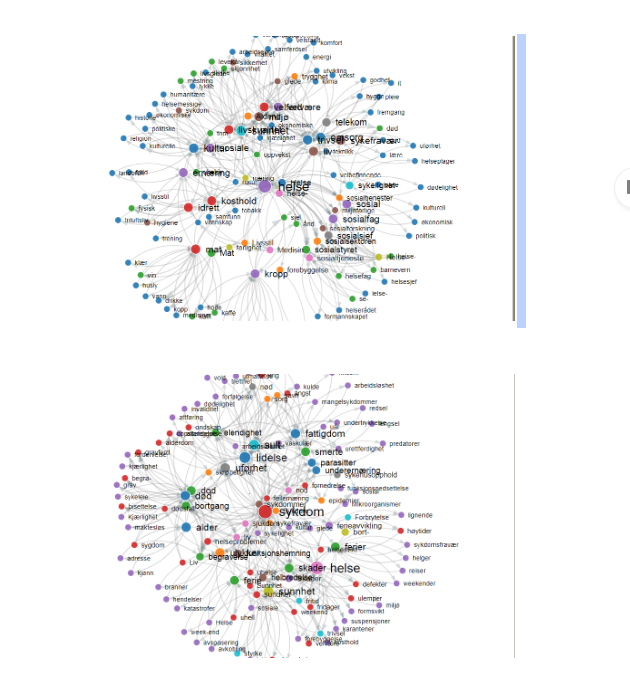

In [19]:
helse = nb.make_graph('helse', cutoff=12)

In [20]:
sykdom = nb.make_graph('sykdom', cutoff=12)

In [50]:
def show_topoi(graf):
    comm = gnl.community_dict(graf)
    pos=""
    for x in comm:
        pos += "### " + x + "\n"
        pos += "<span style='font-size:1.2em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
    mu.printmd(pos)

# Topoi for 'helse' og 'sykdom'

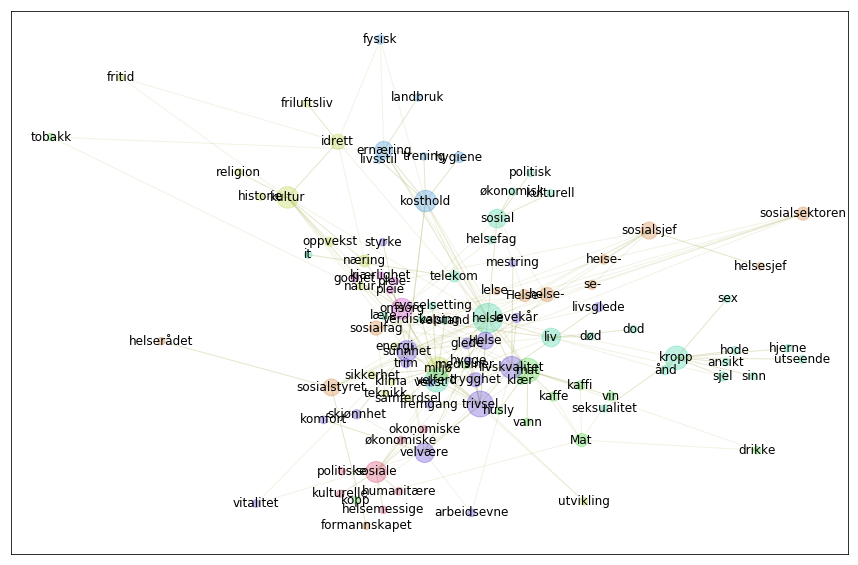

In [26]:
gnl.show_graph(helse, spread = 1, fontsize=12)

In [51]:
show_topoi(helse)

### miljø-kultur
<span style='font-size:1.2em'>miljø, kultur, idrett, næring, oppvekst, natur, energi, friluftsliv, klima, historie, samferdsel, fritid, religion, sikkerhet, teknikk, utvikling</span>
### mat-Mat
<span style='font-size:1.2em'>mat, Mat, kaffi, kaffe, vin, vann, medisiner, drikke, kopp, klær, husly, tobakk</span>
### helse-kropp
<span style='font-size:1.2em'>helse, kropp, velferd, sosial, liv, telekom, ånd, sjel, kulturell, velstand, verdiskaping, utseende, sinn, hjerne, sex, helsefag, lære, hode, økonomisk, seksualitet, politisk, it, sysselsetting, ansikt, dod, død</span>
### kosthold-ernæring
<span style='font-size:1.2em'>kosthold, ernæring, hygiene, fysisk, livsstil, landbruk, trening</span>
### trivsel-livskvalitet
<span style='font-size:1.2em'>trivsel, livskvalitet, sunnhet, velvære, Helse, trygghet, glede, levekår, trim, livsglede, skjønnhet, vekst, styrke, vitalitet, komfort, fremgang, arbeidsevne, hygge, mestring</span>
### omsorg-godhet
<span style='font-size:1.2em'>omsorg, godhet, pleie-, pleie, kjærlighet</span>
### sosiale-politiske
<span style='font-size:1.2em'>sosiale, politiske, humanitære, helsemessige, økonomiske, kulturelle, okonomiske</span>
### sosialstyret-sosialsjef
<span style='font-size:1.2em'>sosialstyret, sosialsjef, helse-, sosialfag, sosialsektoren, Helse-, se-, heise-, helsesjef, lelse-, helserådet, formannskapet</span>


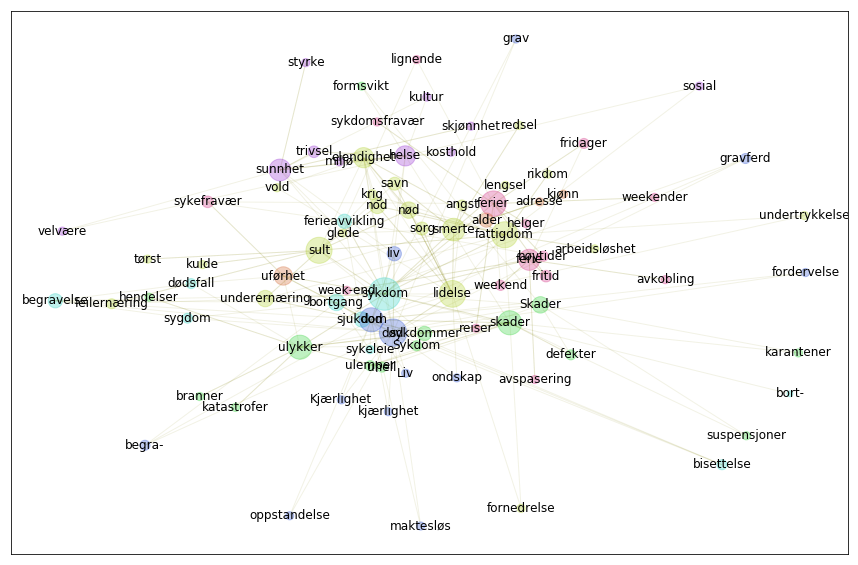

In [14]:
gnl.show_graph(sykdom, spread = 1.4, fontsize=12)

In [52]:
show_topoi(sykdom)

### lidelse-sult
<span style='font-size:1.2em'>lidelse, sult, fattigdom, smerte, elendighet, nød, underernæring, nod, sorg, savn, krig, feilernæring, angst, undertrykkelse, arbeidsløshet, tørst, vold, kulde, lengsel, glede, fornedrelse, rikdom, redsel</span>
### skader-ulykker
<span style='font-size:1.2em'>skader, ulykker, Skader, sykdommer, Sykdom, defekter, ulemper, uhell, branner, formsvikt, hendelser, katastrofer, suspensjoner, karantener</span>
### sykdom-bortgang
<span style='font-size:1.2em'>sykdom, bortgang, sjukdom, ferieavvikling, begravelse, bisettelse, dødsfall, sygdom, sykeleie, bort-</span>
### død-dod
<span style='font-size:1.2em'>død, dod, liv, gravferd, begra-, grav, fordervelse, oppstandelse, Liv, Kjærlighet, maktesløs, ondskap, kjærlighet</span>
### sunnhet-helse
<span style='font-size:1.2em'>sunnhet, helse, trivsel, skjønnhet, sosial, styrke, kultur, velvære, miljø, kosthold</span>
### ferier-ferie
<span style='font-size:1.2em'>ferier, ferie, sykefravær, fritid, høytider, fridager, weekend, week-end, helger, lignende, avspasering, sykdomsfravær, weekender, avkobling, reiser</span>
### uførhet-alder
<span style='font-size:1.2em'>uførhet, alder, adresse, kjønn</span>


## figur for lege pasient

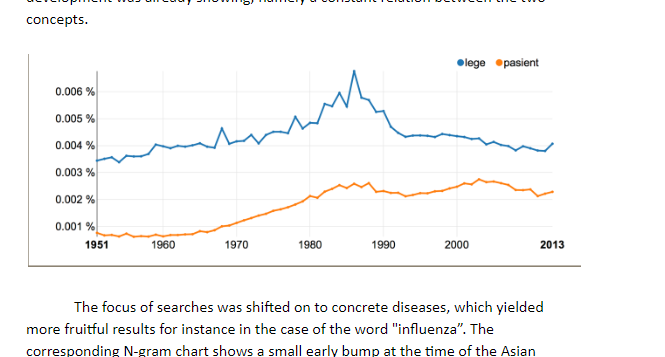

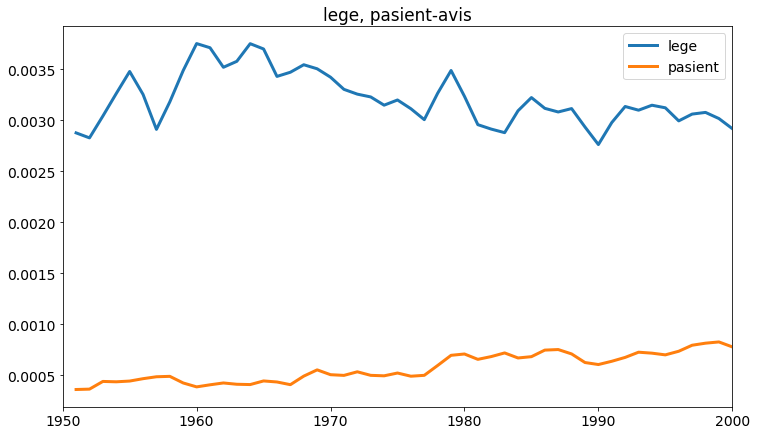

In [57]:
ngram('lege, pasient');

# Influensa

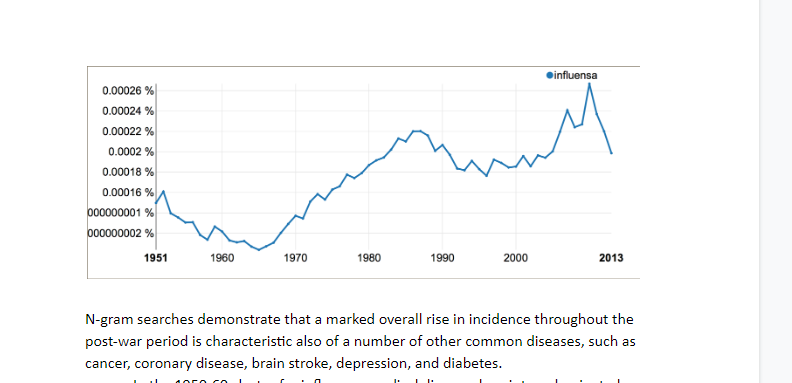

## Influensa i aviser og bøker, først avis

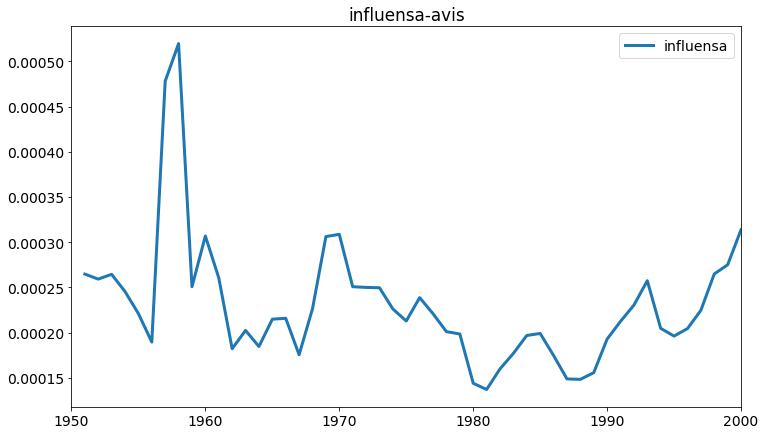

In [58]:
ngram('influensa', smooth=2);

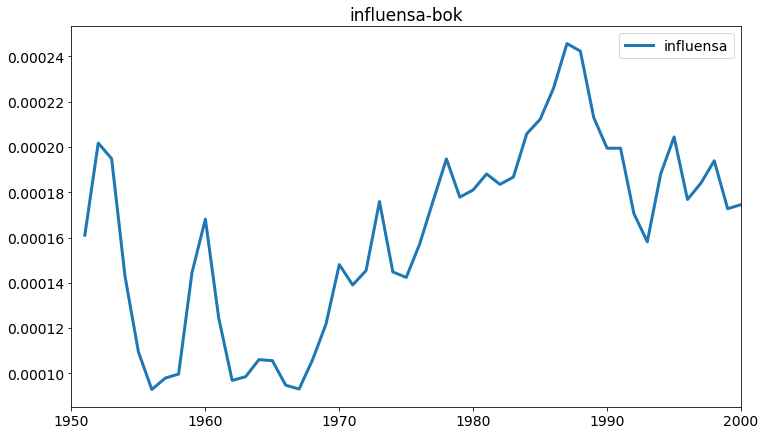

In [60]:
ngram("influensa", media='bok')

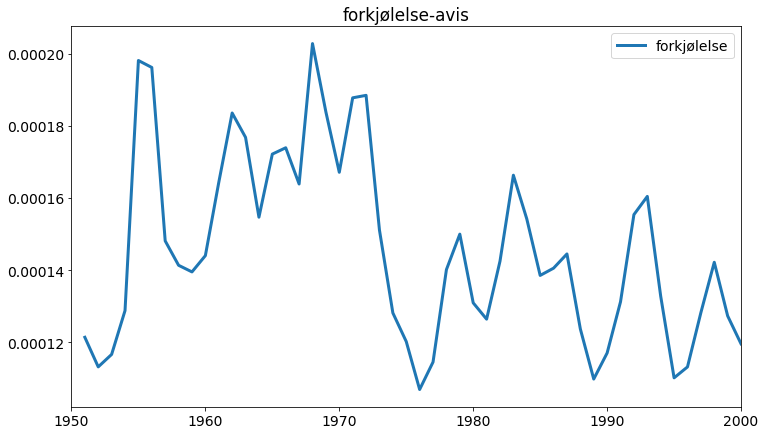

In [59]:
ngram('forkjølelse', smooth=2);

# Trendlinjer med unigram fra fulltekst-data

Linjene er relativisert til summen av punktum, kommma og 'og' - alle plot fra aviser.

**Konklusjon** Trendlinjenene ser ut til å vise det samme, så vi kan godt bare benytte NB N-gram som ligger på internett. 

In [68]:
def unigram_agg(words, media='avis', period=(1950, 2000)):
    return pd.concat([nb.frame(nb.unigram(word, media=media, period=period), word) for word in words], axis=1).sum(axis=1)

In [71]:
agg = nb.frame(unigram_agg(". , og".split()), 'tot')

In [72]:
def unigrams(words, media = 'avis', period=(1950, 2000)):
    return  pd.concat([nb.frame(nb.unigram(word, media=media, period=period), word) for word in words], axis=1)

In [87]:
def unigrams_rel(words, media = 'avis', period=(1950, 2000), rel=agg.tot):
    unis = pd.concat([nb.frame(nb.unigram(word, media=media, period=period), word) for word in words], axis=1)
    return  nb.frame({x: unis[x]/rel for x in unis}).transpose()

In [88]:
hsf_rel = unigrams_rel('helse syk sykdom frisk'.split(), media='avis', period=(1950, 2000))

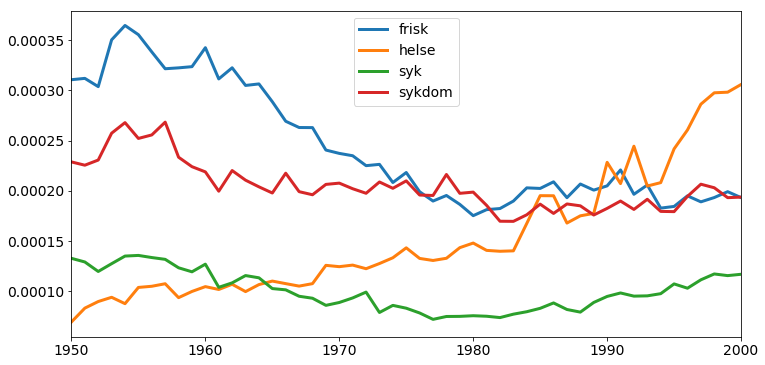

In [90]:
hsf_rel.plot(lw=3, figsize=(12,6))

In [91]:
influensa = unigrams_rel('influensa'.split())

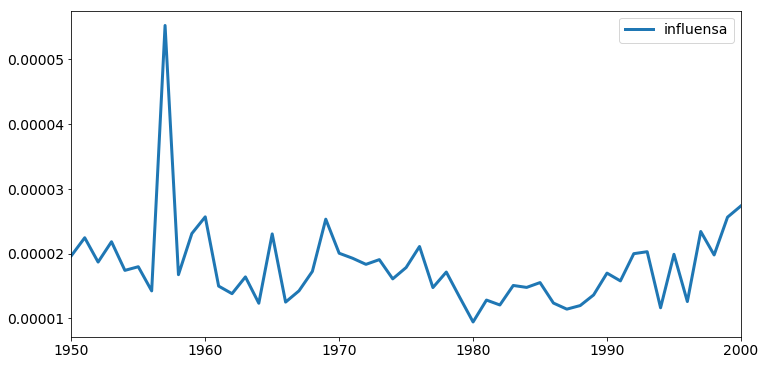

In [93]:
influensa.plot(lw=3, figsize=(12,6))

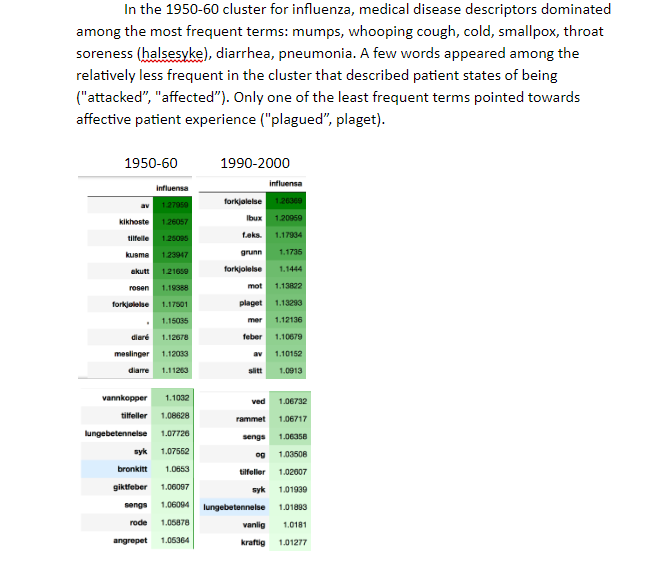


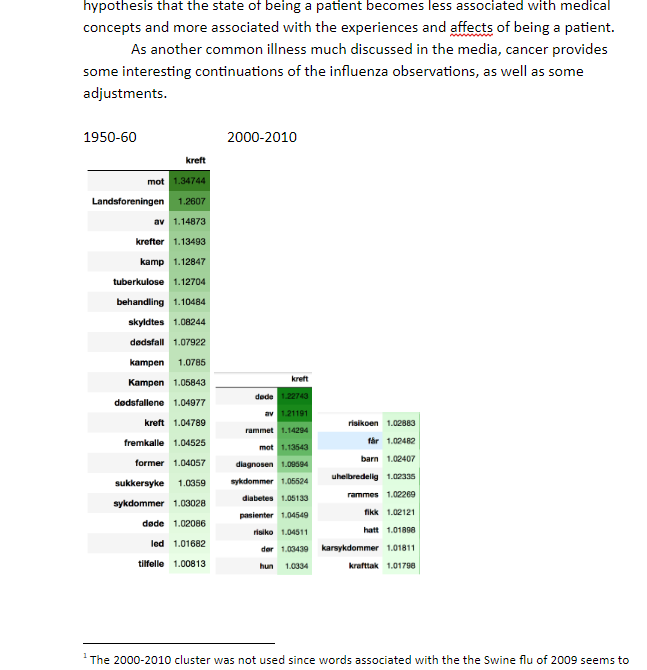

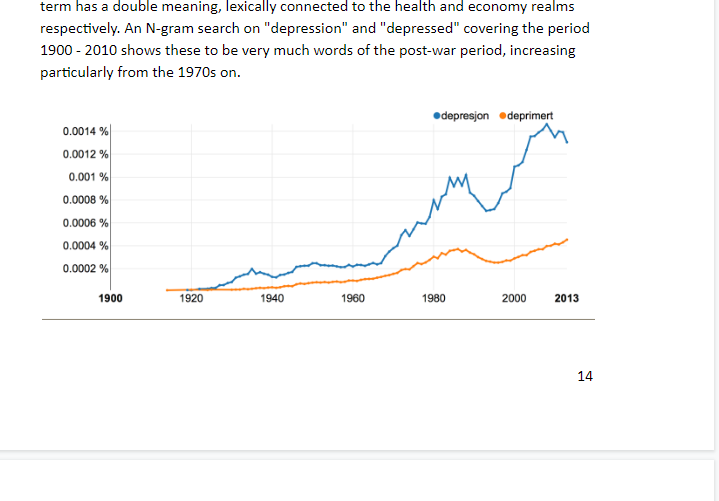

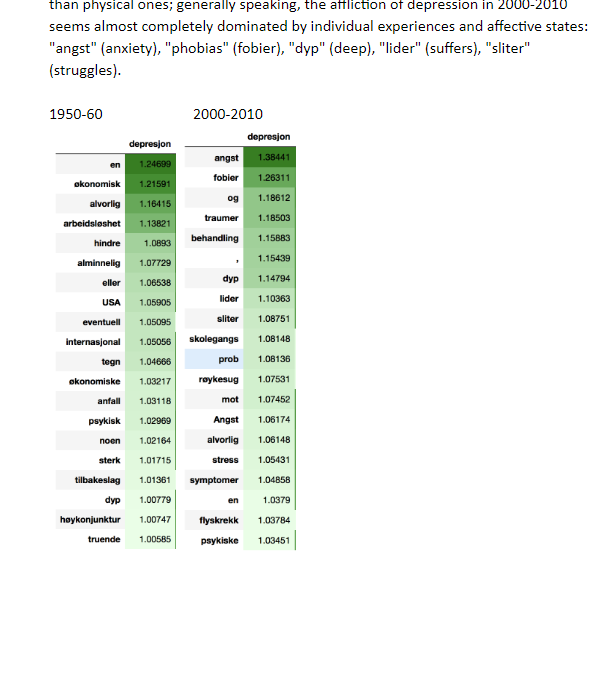